# Iris : présentation de la situation

Le jeu de données auquel nous allons nous intéresser est un jeu de données célèbre. Il a été créé et utilisé par Ronald Aylmer Fisher en 1936 (biologiste et statisticien) et concerne 3 espèces d'iris : setosa, virginica et versicolor. 

| Ronald Aylmer Fisher | Iris setosa | Iris virginica | Iris versicolor |
|:--------------------:|:-----------:|:--------------:|:---------------:|
| <img src='./images/portrait2.png'>  | <img src='./images/iris_setosa.jpg'>  | <img src='./images/iris_virginica.jpg'> | <img src='./images/iris_virginica.jpg'>  |

Ce jeu de données est composé de 50 individus pour chacune des trois espèces (setosa, versicolor, virginica) soit 150 individus en tout.  


Pour chacun de ces individus on dispose des champs :
```
- id              : numéro d'échantillon (identifiant)  

- longueur_sepale : longueur des sépales  

- largeur_sepale  : largeur des sépales  

- longueur_petale : longueur des pétales  

- largeur_petale  : largeur des pétales  

- espece          : 'Iris-setosa', 'Irid_virginica' ou 'Iris-versicolor'
```

La question que se posait M. Fisher est, vous l'avez sans doute devinée :

<div class = "alert alert-danger">

"Puis-je, à partir des longueurs et largeurs des sépales et pétales, prédire l'espèce d'un iris ?"
    
</div>

On va donc chercher, à partir des quatre descripteurs `longueur_sepale, largeur_sepale, longueur_petale` et `largeur_petale`, à effectuer une prédiction de l'étiquette `espece`.

# Import de la table de données

Après exécution de la cellule de code suivante, nous disposerons grâce au module `utilitaires_iris` d'une table `table_iris` contenant les 150 enregistrements sous forme de dictionnaires,

In [26]:
import csv

def charger_fichier_entete(nom_fic):
    """ Permet de lire un fichier CSV en utilisant la ligne d'entêtes
        Retourne une liste de dictionnaires.
    """
    lignes = []
    with open(nom_fic, "r", newline ="", encoding ="utf-8") as csvfile:
        lecteur = csv.DictReader(csvfile, delimiter =",")
        for enreg in lecteur :
            lignes.append(dict(enreg))
            for cle, valeur in lignes[-1].items():
                try:
                    lignes[-1][cle] = int(valeur)
                except:
                    try:
                        lignes[-1][cle] = float(valeur)
                    except:
                        pass
    return lignes

table_iris = charger_fichier_entete( './datas/iris.csv' )

On peut désormais accéder aux 150 enregistrements de `table_iris` :

In [27]:
table_iris[0]

{'id': 1,
 'longueur_sepale': 5.1,
 'largeur_sepale': 3.5,
 'longueur_petale': 1.4,
 'largeur_petale': 0.2,
 'espece': 'Iris-setosa'}

In [29]:
table_iris[89]

{'id': 90,
 'longueur_sepale': 5.5,
 'largeur_sepale': 2.5,
 'longueur_petale': 4.0,
 'largeur_petale': 1.3,
 'espece': 'Iris-versicolor'}

# Les 3 espèces d'iris sont-elles "séparées" les unes des autres ?

Nous avons eu l'intuition dans les exercices de cours (voir exercice 2) d'une condition "visuelle" pour que la méthode des k plus proches voisins fonctionne bien. Cette condition était qu'il est préférable que les individus ayant des étiquettes différentes soient situés dans des "zones" bien séparées.  


Nous allons rapidement visualiser ce qui se passe toujours grâce au module `utilitaires_iris`. Ce module nous permet d' afficher des projections 2D des données en choisissant deux descripteurs parmi les quatre (setosa en rouge, versicolor en vert et virginica en bleu) :

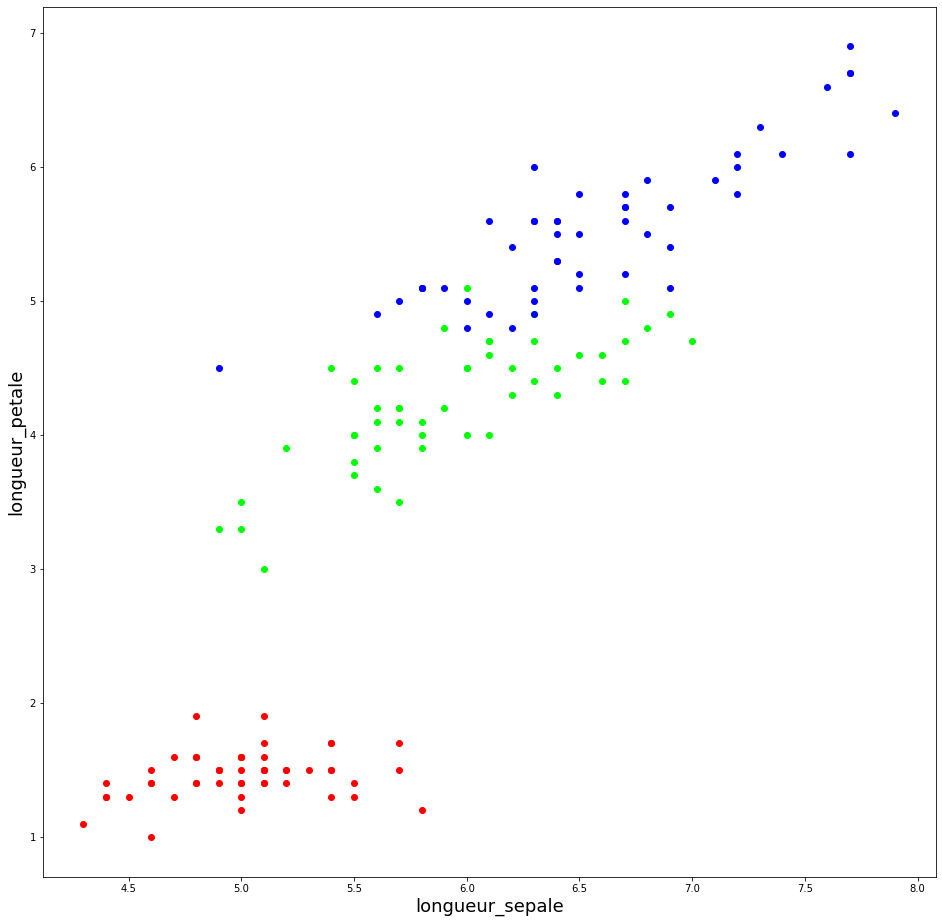

setosa : rouge, versicolor : vert, virginica : bleu


In [36]:
import matplotlib.pyplot as plt

def extraire_2_col(descripteur1, descripteur2, table):
    ''' Retourne trois couples de listes : se, ve, vi
        #setosa, versicolor, virginica
        descripteur1 et descripteur2 sont les noms des colonnes au choix parmi
        longueur_sepale, largeur_sepale, longueur_petale, largeur_petale    
    '''
    se, ve, vi = ([], []), ([], []), ([], [])
    for fleur in table:
        if fleur['espece']=='Iris-setosa':
            se[0].append(fleur[descripteur1])
            se[1].append(fleur[descripteur2])
        elif fleur['espece']=='Iris-versicolor':
            ve[0].append(fleur[descripteur1])
            ve[1].append(fleur[descripteur2])
        else:
            vi[0].append(fleur[descripteur1])
            vi[1].append(fleur[descripteur2])
    return se, ve, vi

def afficher_2_col(descripteur1, descripteur2, table):
    ''' affiche un graphique 2D avec
        en abscisse descripteur1
        en ordonnée descripteur2
    '''
    se, ve, vi = extraire_2_col(descripteur1, descripteur2, table)
    fig = plt.figure(figsize = (16, 16))
    ax = fig.add_subplot(111)
    ax.plot(se[0], se[1], linestyle = ' ', marker = 'o', color = "#ff0000")
    ax.plot(ve[0], ve[1], linestyle = ' ', marker = 'o', color = "#00ff00")
    ax.plot(vi[0], vi[1], linestyle = ' ', marker = 'o', color = "#0000ff")
    
    plt.gca().set_xlabel(descripteur1, size = 18)
    plt.gca().set_ylabel(descripteur2, size = 18)
    plt.show()
    print("setosa : rouge, versicolor : vert, virginica : bleu")

afficher_2_col("longueur_sepale", "longueur_petale", table_iris)

Ou bien afficher des projections 3D de ces données en choisissant trois descripteurs parmi quatre :

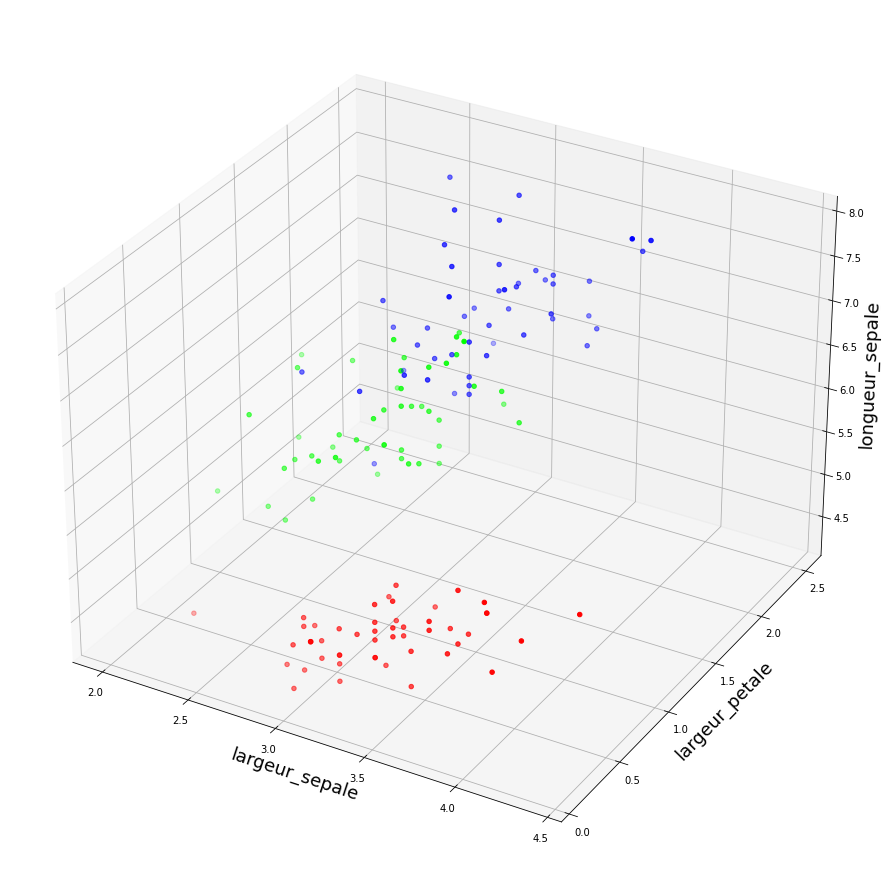

setosa : rouge, versicolor : vert, virginica : bleu


In [39]:
def extraire_3_col(descripteur1, descripteur2, descripteur3, table):
    ''' Retourne trois triplets de listes : se, ve, vi
        #setosa, versicolor, virginica
        descripteur1, descripteur2, descripteur3 sont les noms des colonnes au choix
        parmi longueur_sepale, largeur_sepale, longueur_petale, largeur_petale     
    '''
    se, ve, vi = ([], [], []), ([], [], []), ([], [], [])
    for fleur in table:
        if fleur['espece']=='Iris-setosa':
            se[0].append(fleur[descripteur1])
            se[1].append(fleur[descripteur2])
            se[2].append(fleur[descripteur3])
        elif fleur['espece']=='Iris-versicolor':
            ve[0].append(fleur[descripteur1])
            ve[1].append(fleur[descripteur2])
            ve[2].append(fleur[descripteur3])
        else:
            vi[0].append(fleur[descripteur1])
            vi[1].append(fleur[descripteur2])
            vi[2].append(fleur[descripteur3])    
    return se, ve, vi

def afficher_3_col(descripteur1, descripteur2, descripteur3, table):
    ''' affiche un graphique 2D avec
        en abscisse descripteur1
        en ordonnée descripteur2
        en cote descripteur3
    '''
    se, ve, vi = extraire_3_col(descripteur1, descripteur2, descripteur3, table)    
    fig = plt.figure(figsize = (16, 16))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(se[0], se[1], se[2], marker = 'o', color = "#ff0000")
    ax.scatter(ve[0], ve[1], ve[2], marker = 'o', color = "#00ff00")
    ax.scatter(vi[0], vi[1], vi[2], marker = 'o', color = "#0000ff")
    ax.set_xlabel(descripteur1, size = 18)
    ax.set_ylabel(descripteur2, size = 18)
    ax.set_zlabel(descripteur3, size = 18)
    plt.show()
    print("setosa : rouge, versicolor : vert, virginica : bleu")

afficher_3_col("largeur_sepale", "largeur_petale", "longueur_sepale", table_iris)

<div class = "alert alert-info">

**Question :**
    
En modifiant les descripteurs utilisés dans les représentations graphiques ci-dessus, indiquer si les trois nuages de points classés par espèce sont bien séparés les uns des autres.   
    
    
En déduire si l'algorithme des k plus proches voisins risque de bien fonctionner ou pas.


# Implémentation de l'algorithme des k plus proches voisins

On rappelle que la formule de la distance dans le plan (en 2D) utilise les deux coordonnées $(x;y)$, dans l'espace (en 3D) utilise les trois coordonnées $(x;y;z)$ et en 4D les quatre coordonnées $(x;y;z;t)$.  

Le cas de la 4D nous est nécessaire ici puisque nous avons quatre descripteurs. Ce qui donne finalement pour deux points d'un espace 4D :

$$dist(A, B) = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2 + (z_B-z_A)^2 + (t_A-t_B)^2}$$

<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `calculer_distance` qui :  

- prend en paramètre deux dictionnaires `iris_a` et `iris_b` ayant les quatre champs `longueur_sepale`, `largeur_sepale`, `longueur_petale`, `largeur_petale` comme ceux présents dans `table_iris`

- renvoie la distance **arrondie à trois décimales** entre ces deux iris en prenant en compte les valeurs de ces quatre champs.
 
Deux assertions qui doivent être vérifiées par votre fonction sont données ci-dessous.
 
**Rappel :**     
    
- On utilisera `math.sqrt` du module `math` pour calculer la racine carrée et `**` pour mettre au carré.

- On utilisera `round(x, 3)` pour arrondir un nombre `x` en ne gardant que trois décimales.

In [40]:
import math

def calculer_distance(iris_a, iris_b):
    resultat = 0
    cles = ['longueur_sepale', 'largeur_sepale', 'longueur_petale', 'largeur_petale']
    for cle in cles:
        resultat = resultat + (iris_a[cle]-iris_b[cle])**2
    resultat = math.sqrt(resultat)
    return round(resultat, 3)

In [43]:
iris8 = table_iris[7]
iris18 = table_iris[17]

iris_inconnu = {'longueur_sepale':5.5,
                'largeur_sepale':3.3,
                'longueur_petale':1.1,
                'largeur_petale':0.2}

assert(calculer_distance(iris8, iris_inconnu) == 0.648)
assert(calculer_distance(iris18, iris_inconnu) == 0.548)

<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `table_distances` qui : 

- prend en paramètre :

    - une table `table` (comme `table_iris`)  contenant des dictionnaires représentant des iris
    - un dictionnaire `iris_inconnu` représentant un iris inconnu 

- renvoie une liste de dictionnaire contenant un champ `distance` (dont la valeur est la distance entre l'enregistrement et `iris_inconnu` arrondie à 3 décimales) et un champ `espece`.

Deux assertions qui doivent être vérifiées par votre fonction sont données ci-dessous.

In [44]:
def table_distances(table, iris_inconnu):
    table_res = []
    for iris in table:
        table_res.append({'distance' : calculer_distance(iris, iris_inconnu),
                         'espece' : iris['espece']})
    return table_res

In [45]:
table_travail = table_distances(table_iris, iris_inconnu)

assert( table_travail[7]['distance'] == 0.648 )
assert( table_travail[17]['distance'] == 0.548 )

<div class = "alert alert-info">

**Question :**

Programmer ci-dessous le code d'une fonction `trier_puis_extraire` qui :  

- prend en paramètre :  

    - une table `table` (comme `table_travail`) 
    
    - un nombre entier `k`

- trie la table selon la distance croissante,

- renvoie la liste des étiquettes (c'est à dire la liste des valeurs du champ `espece`) des `k` premiers iris de la table triée

Une assertion qui doit être vérifiée par votre fonction est donnée ci-dessous.
</div>

In [46]:
def trier_puis_extraire(table, k):
    table.sort(key = lambda iris : iris["distance"])
    return [table[i]['espece'] for i in range(k)]

In [47]:
iris_inconnu = {'longueur_sepale': 6.5,
                'largeur_sepale': 2.8,
                'longueur_petale': 5.0,
                'largeur_petale': 1.5}

table_travail = completer_avec_distance(table_iris, iris_inconnu)
liste_k_etiquettes = trier_puis_extraire(table_travail, 5)
assert(liste_k_etiquettes ==  ['Iris-virginica','Iris-versicolor','Iris-versicolor',
                                'Iris-versicolor','Iris-virginica'])

table_travail = completer_avec_distance(table_iris, iris_inconnu)
liste_k_etiquettes = trier_puis_extraire(table_travail, 1)
assert( liste_k_etiquettes ==  ['Iris-virginica'])

<div class = "alert alert-info">  

**Question :**  
    
Grâce au tri, la fonction `trier_puis_extraire` est assez concise à programmer. En revanche elle pourrait présenter un inconvénient majeur dans le cas d'un jeu de données important. De quel inconvénient majeur s'agit-il?
</div>
<div class = "alert alert-info">

**Question :**  
    
Pour obtenir *l'élément le plus commun présent dans une liste* écrivons une fonction `extraire_element_majoritaire`.
 
Pour cela, on commence par créer un dictionnaire dont les clés sont les éléments de la liste et les valeurs le nombre d'occurence (nous l'avons déjà fait).

Ensuite, on crée une liste de couples (clé, valeur) à partir du dictionnaire, que l'on trie selon les valeurs (par ordre croissant ou décroissant, au choix).

Il ne reste plus qu'à renvoyer le bon élément de cette liste.
</div>

In [58]:
def extraire_element_majoritaire(liste):
    dico = {}
    for elem in liste:
        if elem in dico:
            dico[elem] += 1
        else:
            dico[elem] = 1
    couples = [(cle, valeur) for cle, valeur in dico.items()]
    couples.sort(key = lambda couple:couple[1])
    return couples[-1][0]

In [59]:
assert(extraire_element_majoritaire(['bip', 'bip', 'blip', 'blip', 'bip']) == 'bip')
assert(extraire_element_majoritaire([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]) == 5)

<div class = "alert alert-info">

**Question :**  
    
Intégrez tout ce qui précdède dans une unique fonction `algo_k_plus_proches_voisins` qui prend en paramètres :  
    
- un nombre entier `k`,  
    
- une table d'iris étiquetés `table_iris`,  

- et un iris non étiqueté `iris_inconnu` 
    
et renvoie l'étiquette de `iris_inconnu` obtenue selon l'algorithme des k plus proches voisins.

In [60]:
def algo_k_plus_proches_voisins(k, table_iris, iris_inconnu):
    table_completee = completer_avec_distance(table_iris, iris_inconnu)
    liste_k_etiquettes = trier_puis_extraire(table_completee, k)
    return extraire_element_majoritaire(liste_k_etiquettes)

In [62]:
table_iris = charger_fichier_entete( './datas/iris.csv' )

iris_inconnu = {'longueur_sepale': 6.5,
                'largeur_sepale': 2.8,
                'longueur_petale': 5.0,
                'largeur_petale': 1.5}

assert(algo_k_plus_proches_voisins(5, table_iris, iris_inconnu) == 'Iris-versicolor')
assert(algo_k_plus_proches_voisins(1, table_iris, iris_inconnu) == 'Iris-virginica')